In [22]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [23]:
#Load data
dataset_raw = pd.read_csv("insurance.csv")
dataset = dataset_raw.copy()
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'BMI Values')

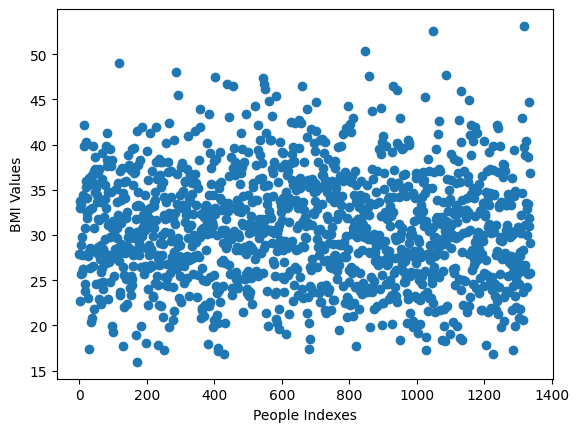

In [24]:
#EDA 

#The distrubiton of BMI
bmi = dataset.iloc[:,2]
dataset_indexes = dataset.index.values.tolist()

plt.scatter(dataset_indexes,bmi)
plt.xlabel("People Indexes") 
plt.ylabel("BMI Values")


<BarContainer object of 1338 artists>

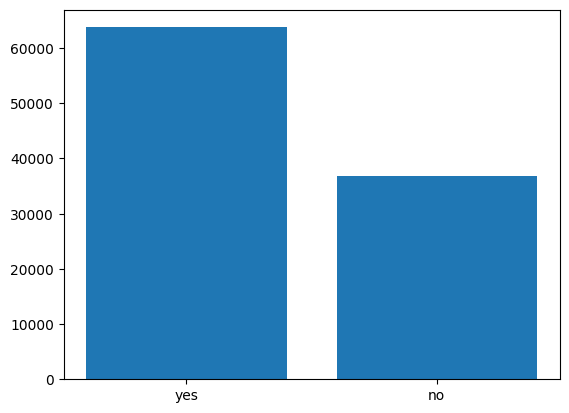

In [21]:
#Relationship between smokers and charges
smokers = dataset.iloc[:,4]
charges = dataset.iloc[:,6]

plt.bar(smokers,charges)


<Axes: xlabel='population', ylabel='smoker'>

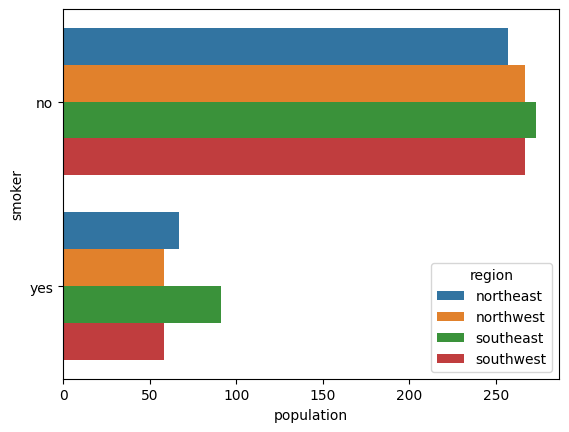

In [141]:
#Relationship between smokers and region
# it is quite har to visualize two categorical datas relationship so to make it a little bit easier the population attribute added

regions_and_population = dataset.groupby(['smoker','region']).size().reset_index()
regions_and_population = regions_and_population.rename(columns={0:"population"})
sns.barplot(data = regions_and_population,x = 'population' , y = "smoker", hue= "region")